# IRIS

## Codigo

<ipython-input-1-03b1a4d67898>:60: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytrain_encoded = ytrain.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-1-03b1a4d67898>:61: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_encoded = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])



Evaluando modelo: CategoricalNB
Precisión: 0.9800


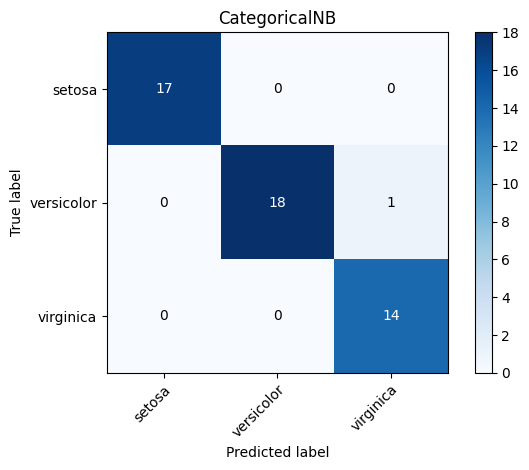


Evaluando modelo: GaussianNB
Precisión: 0.9400


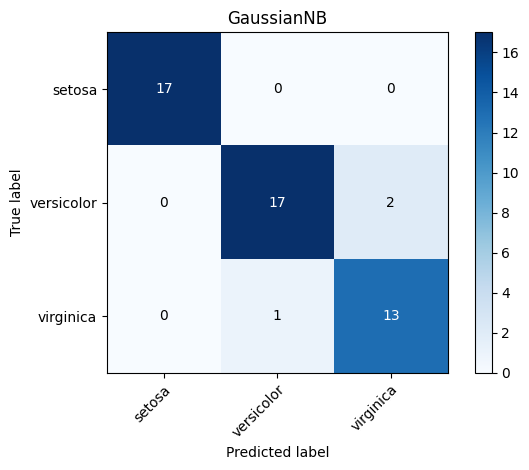


Evaluando modelo: MultinomialNB
Precisión: 0.6400


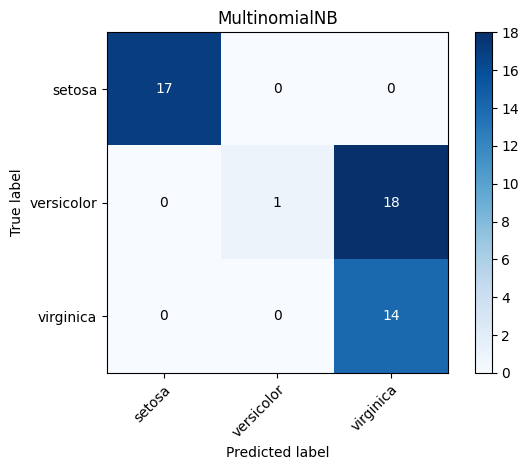


Evaluando modelo: ComplementNB
Precisión: 0.6200


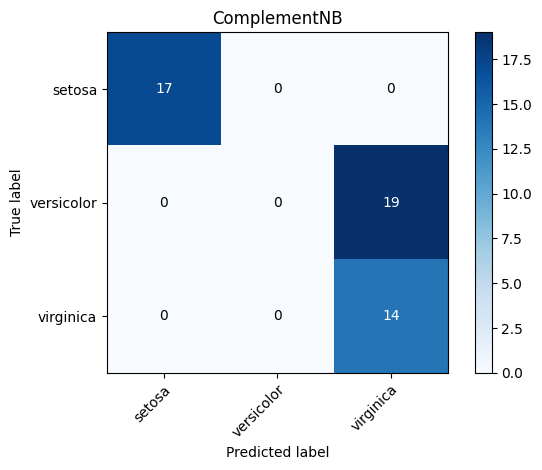


Evaluando modelo: BernoulliNB
Precisión: 0.2800


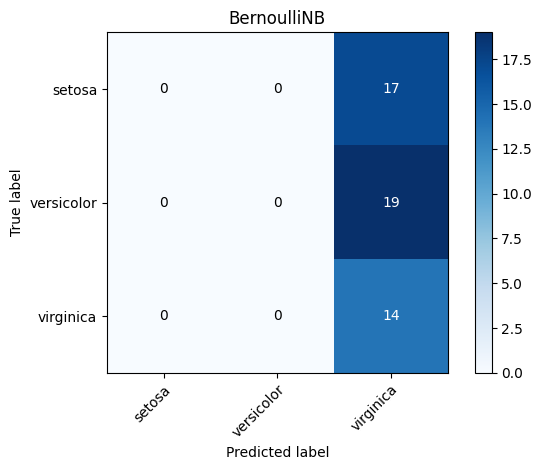

In [ ]:
# Importación de datos
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Cargar dataset
iris = sns.load_dataset('iris')

# Separar datos de entrada y salida
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Separar datos de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)

# Función matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, titleSup=None):
    if not title:
        title = 'Normalized confusion matrix' if normalize else 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes, title=title,
           ylabel='True label', xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    plt.show()

# Lista de modelos a probar
models = {
    "CategoricalNB": CategoricalNB(),
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB()
}

# Transformar las etiquetas de ytrain y ytest a numéricas
ytrain_encoded = ytrain.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
ytest_encoded = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])

# Nombres de las clases
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])

# Evaluar cada modelo
for name, model in models.items():
    print(f"\nEvaluando modelo: {name}")
    # Entrenar el modelo
    model.fit(Xtrain, ytrain_encoded)
    # Predecir
    y_model = model.predict(Xtest)

    # Si el modelo produce valores numéricos (como CategoricalNB):
    if isinstance(y_model[0], int) or isinstance(y_model[0], np.integer):
        y_model_encoded = y_model
    else:  # Si produce etiquetas categóricas
        y_model_encoded = pd.Series(y_model).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2]).to_numpy()

    # Calcular precisión
    accuracy = accuracy_score(ytest_encoded, y_model_encoded)
    print(f"Precisión: {accuracy:.4f}")

    # Matriz de confusión
    plot_confusion_matrix(ytest_encoded, y_model_encoded, classes=clases_iris, normalize=False, title=name)


## Explicación

He usado un bucle para probar todos los modelos para simplificar el proceso de comparación y a la vez hacerlo más eficiente y organizado. Ya que permite asi puedo comparar directamente su rendimiento con el menor esfuerzo. Es una práctica estándar en machine learning y experimentación.

# Penguin

## Codigo

In [ ]:
# importación de datos
import seaborn as sns
penguin = sns.load_dataset('penguins')
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female



Evaluando modelo: GaussianNB
Precisión: 0.8000


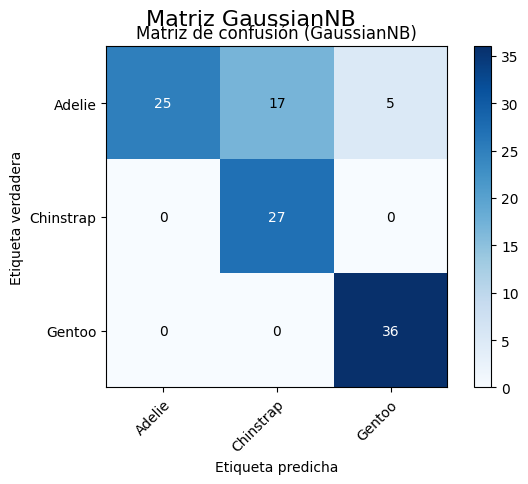


Evaluando modelo: MultinomialNB
Precisión: 0.7455


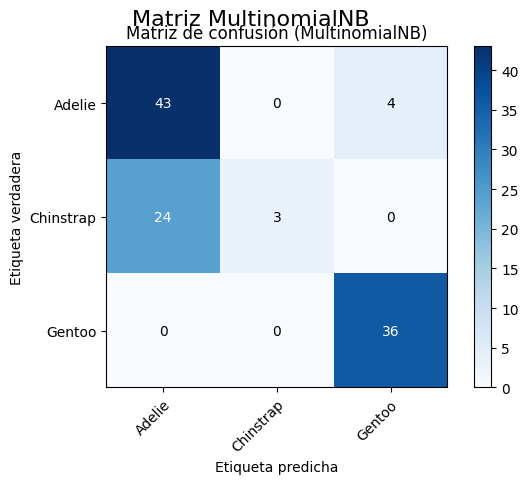


Evaluando modelo: ComplementNB
Precisión: 0.7818


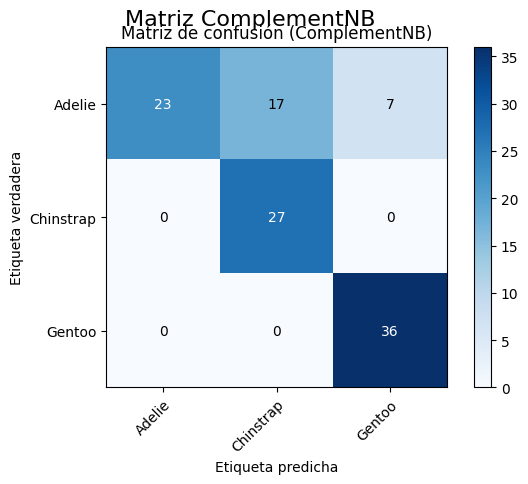


Evaluando modelo: BernoulliNB
Precisión: 0.9818


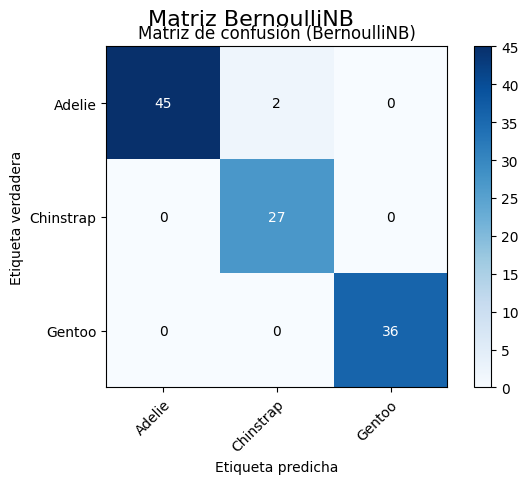


Evaluando modelo: CategoricalNB
Precisión: 0.9818


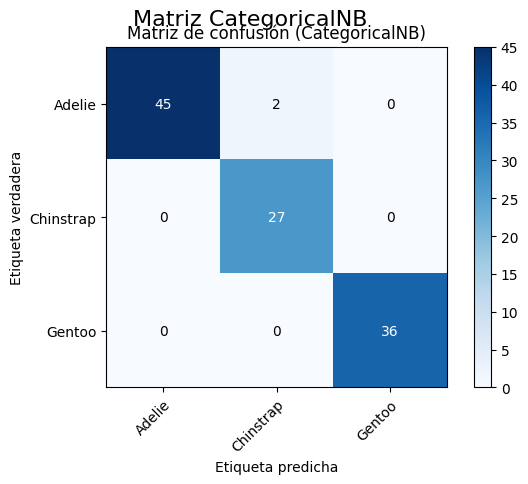

In [ ]:
# Importar librerías necesarias
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, titleSup=None):
    """
    Función que imprime y grafica la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    if not title:
        title = 'Matriz de confusión normalizada' if normalize else 'Matriz de confusión sin normalizar'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title, ylabel='Etiqueta verdadera', xlabel='Etiqueta predicha')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

# Cargar el dataset de pingüinos
penguins = sns.load_dataset('penguins').dropna()

# Separar variables de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']

# Codificar las variables categóricas en X (isla y sexo)
X_penguins = pd.get_dummies(X_penguins, columns=['island', 'sex'], drop_first=True)

# Codificar la variable objetivo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_penguins)

# Escalar los datos (StandardScaler para GaussianNB y otros modelos que lo soportan)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_penguins)

# Escalar los datos con MinMaxScaler para MultinomialNB y ComplementNB
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X_penguins)

# Transformar los datos en valores enteros positivos para CategoricalNB
X_categorical = X_penguins.copy()
for col in X_categorical.columns:
    X_categorical[col] = pd.cut(X_categorical[col], bins=5, labels=False)

# Dividir los datos en entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y_encoded, test_size=0.33, random_state=1)
Xtrain_minmax, Xtest_minmax, _, _ = train_test_split(X_scaled_minmax, y_encoded, test_size=0.33, random_state=1)
Xtrain_cat, Xtest_cat, _, _ = train_test_split(X_categorical, y_encoded, test_size=0.33, random_state=1)

# Modelos a evaluar
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

# Evaluar cada modelo
for name, model in models.items():
    print(f"\nEvaluando modelo: {name}")

    if name in ["MultinomialNB", "ComplementNB"]:
        # Usar datos escalados con MinMaxScaler
        model.fit(Xtrain_minmax, ytrain)
        y_pred = model.predict(Xtest_minmax)
    elif name == "CategoricalNB":
        # Usar datos categóricos transformados
        model.fit(Xtrain_cat, ytrain)
        y_pred = model.predict(Xtest_cat)
    else:
        # Usar datos escalados con StandardScaler
        model.fit(Xtrain, ytrain)
        y_pred = model.predict(Xtest)

    # Calcular precisión
    accuracy = accuracy_score(ytest, y_pred)
    print(f"Precisión: {accuracy:.4f}")

    # Matriz de confusión
    clases_penguins = label_encoder.classes_  # Etiquetas originales
    plot_confusion_matrix(ytest, y_pred, classes=clases_penguins, normalize=False,
                          title=f'Matriz de confusión ({name})', titleSup=f'Matriz {name}')
    plt.show()
